# Como podemos criar uma cidade mais justa? Uma analise do plano diretor

### COMPARAR PLANO DIRETOR DE SP COM PLANO DIRETOR DE LONDRES, PARIS, AMSTERDAM E ANALISAR QUALIDADE DE VIDA COM ZONEAMENTO


### Hipotese

olhos na rua, jane jacobs, edificacoes de uso misto, bairros residenciais de alto poder de compra sao os mais lucrativos a uma cidade? seguranca com tipo de zoneamento, idh com porcentagem de zoneamento de certo tipo, idh de bairros e qual seu tipo de zoneamento (baixo idh, qual zoneamento? alto id, qual zoneamento?

In [12]:
import pandas as pd
import os
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs
from pointpats.distance_statistics import g, f, k
from pointpats import PoissonPointProcess
import numpy as np
from sklearn.neighbors import KernelDensity
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx




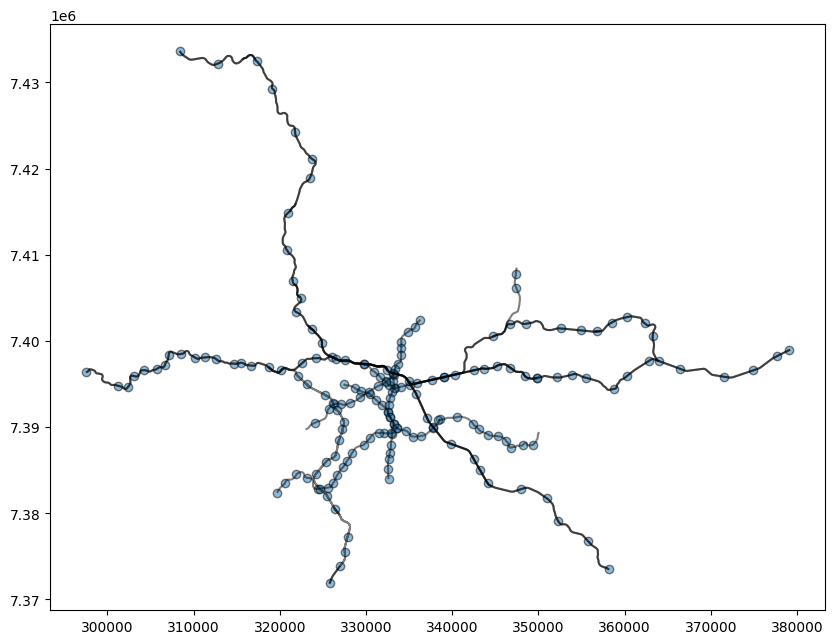

In [3]:


# Set the path to the directory containing your shapefiles
directory = "data/metro_trem_sp/"  # Replace with the path to your files

# List of shapefiles to load
shapefiles = [
    "SIRGAS_SHP_estacaometro_point.shp",
    "SIRGAS_SHP_estacaotrem.shp",
    "SIRGAS_SHP_linhametro_line.shp",
    "SIRGAS_SHP_linhatrem.shp"
]

# Initialize an empty list to hold GeoDataFrames
gdfs = []

# Loop through the shapefiles, read them, and append to the list
for shp in shapefiles:
    filepath = os.path.join(directory, shp)
    try:
        # Read the shapefile into a GeoDataFrame
        gdf = gpd.read_file(filepath)
        gdfs.append(gdf)
    except Exception as e:
        print(f"Could not read {shp}: {e}")

# Concatenate all GeoDataFrames into one if available
if gdfs:
    combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

    # Plot the combined GeoDataFrame
    combined_gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
    plt.show()
else:
    print("No valid shapefiles found.")


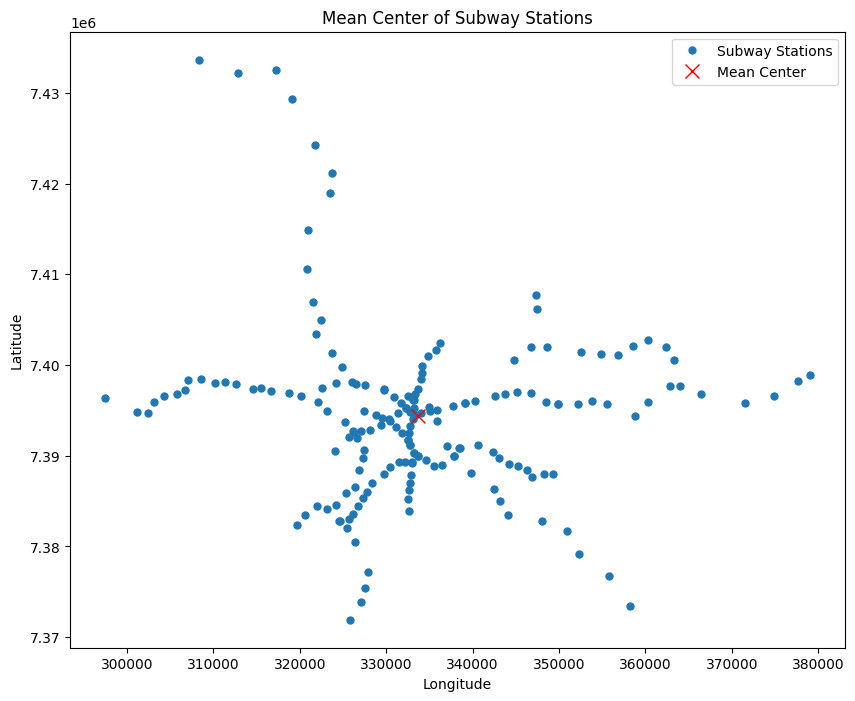

In [4]:

directory = "data/metro_trem_sp/"  # Replace with the path to your files

# List of shapefiles to load
shapefiles = [
    "SIRGAS_SHP_estacaometro_point.shp",
    "SIRGAS_SHP_estacaotrem.shp"
]

# Initialize an empty list to hold GeoDataFrames
gdfs = []

# Loop through the shapefiles, read them, and append to the list
for shp in shapefiles:
    filepath = os.path.join(directory, shp)
    try:
        # Read the shapefile into a GeoDataFrame
        gdf = gpd.read_file(filepath)
        gdfs.append(gdf)
    except Exception as e:
        print(f"Could not read {shp}: {e}")

# Concatenate all GeoDataFrames containing point data into one if available
if gdfs:
    combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

    # Extract x and y coordinates
    combined_gdf['x'] = combined_gdf.geometry.x
    combined_gdf['y'] = combined_gdf.geometry.y

    # Create a PointPattern for mean center calculation
    coordinates = combined_gdf[['x', 'y']].values
    point_pattern = PointPattern(coordinates)

    # Calculate mean center
    mean_center_coords = mean_center(point_pattern.points)

    # Plot subway station points and the mean center
    plt.figure(figsize=(10, 8))
    plt.plot(point_pattern.points['x'], point_pattern.points['y'], 'o', markersize=5, label='Subway Stations')
    plt.plot(mean_center_coords[0], mean_center_coords[1], 'x', markersize=10, color='red', label='Mean Center')
    plt.legend()
    plt.title('Mean Center of Subway Stations')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


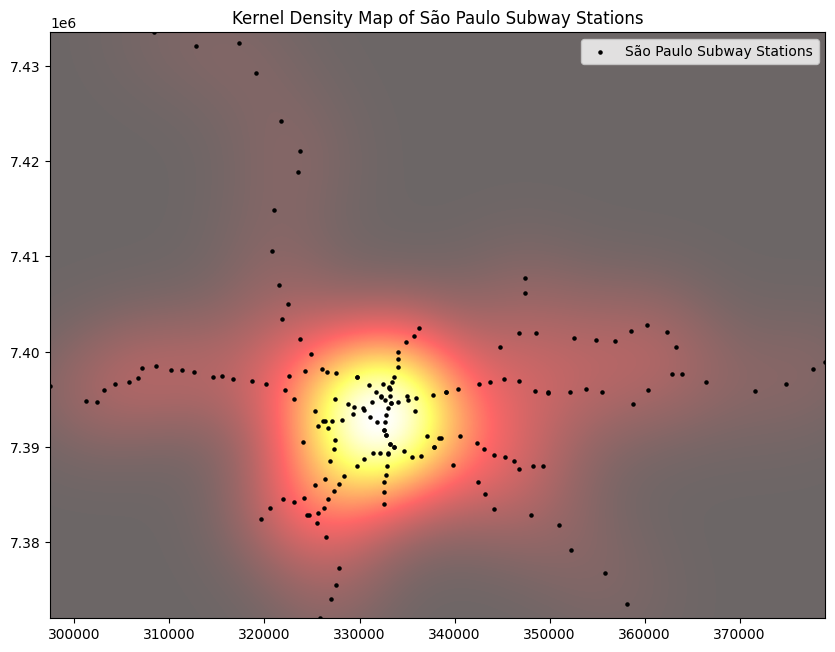

In [5]:

# Path to directory and shapefiles for São Paulo subway stations
directory = "data/metro_trem_sp/"  # Replace with your actual path
shapefiles = ["SIRGAS_SHP_estacaometro_point.shp", "SIRGAS_SHP_estacaotrem.shp"]

# Load the GeoDataFrames and concatenate them
gdfs = [gpd.read_file(directory + shp) for shp in shapefiles]
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Extract coordinates for KDE
combined_gdf['x'] = combined_gdf.geometry.x
combined_gdf['y'] = combined_gdf.geometry.y
station_coords = combined_gdf[['x', 'y']].values

# Perform KDE
kde = KernelDensity(bandwidth=5000, kernel='gaussian')  # Adjust bandwidth as needed
kde.fit(station_coords)

# Define the grid
xmin, ymin, xmax, ymax = combined_gdf.total_bounds
xgrid = np.linspace(xmin, xmax, 500)
ygrid = np.linspace(ymin, ymax, 500)
xv, yv = np.meshgrid(xgrid, ygrid)
grid_coords = np.vstack([xv.ravel(), yv.ravel()]).T

# Calculate density
density = np.exp(kde.score_samples(grid_coords))
density = density.reshape(500, 500)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot station points
combined_gdf.plot(ax=ax, color='black', markersize=5, label='São Paulo Subway Stations')

# Add KDE density map
ax.imshow(density, extent=(xmin, xmax, ymin, ymax), origin='lower', cmap='hot', alpha=0.6)

# Title and legend
ax.set_title('Kernel Density Map of São Paulo Subway Stations')
ax.legend()

plt.show()


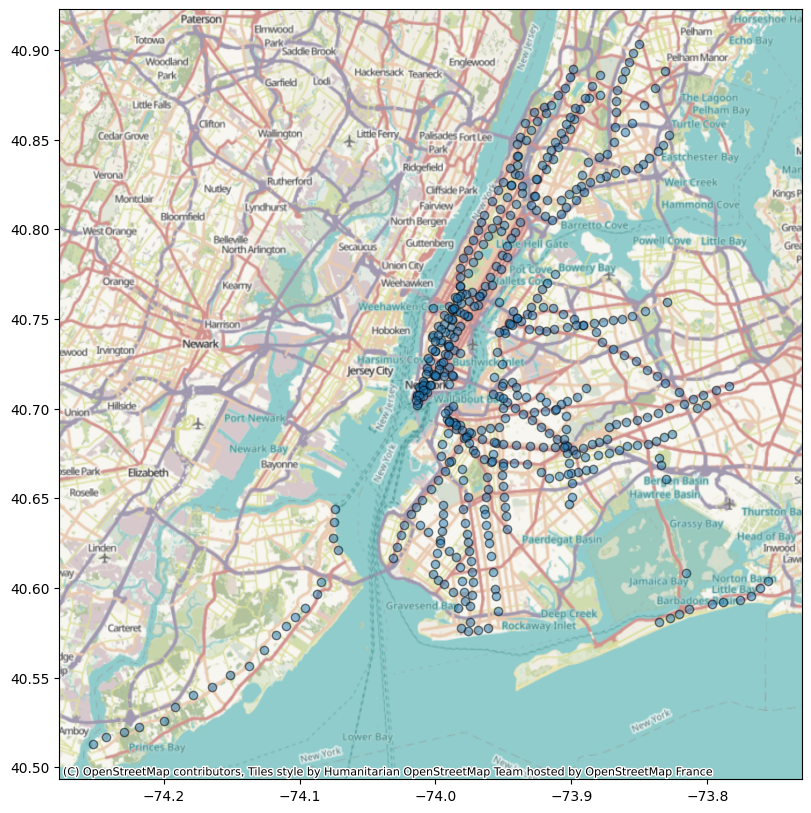

In [6]:

# Path to your GeoJSON file
geojson_file = 'MTA Subway Stations_20241024/geo_export_c1664305-f8f3-482b-9578-db838def4846.shp'

# Read the GeoJSON file into a GeoPandas DataFrame
gdf = gpd.read_file(geojson_file)

# Plot with basemap
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Add a basemap (using a tile service like OpenStreetMap)
ctx.add_basemap(ax, crs=gdf.crs.to_string())

# Show the plot
plt.show()


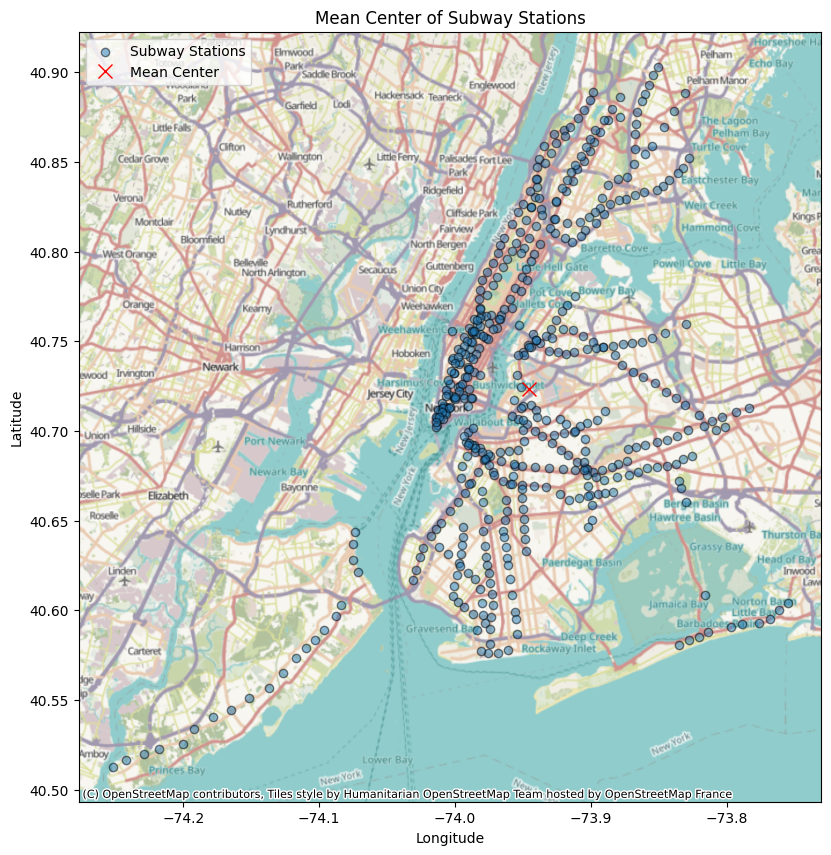

In [7]:


# Path to your GeoJSON file
geojson_file = 'MTA Subway Stations_20241024/geo_export_c1664305-f8f3-482b-9578-db838def4846.shp'

# Read the GeoJSON file into a GeoPandas DataFrame
gdf = gpd.read_file(geojson_file)

# Extract x and y coordinates for mean center calculation
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

# Create a PointPattern for mean center calculation
coordinates = gdf[['x', 'y']].values
point_pattern = PointPattern(coordinates)

# Calculate mean center
mean_center_coords = mean_center(point_pattern.points)

# Plot with basemap
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.5, edgecolor='k', label="Subway Stations")
ax.plot(mean_center_coords[0], mean_center_coords[1], 'x', markersize=10, color='red', label='Mean Center')

# Add a basemap (using OpenStreetMap tiles)
ctx.add_basemap(ax, crs=gdf.crs.to_string())

# Add title, legend, and labels
plt.legend()
plt.title('Mean Center of Subway Stations')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


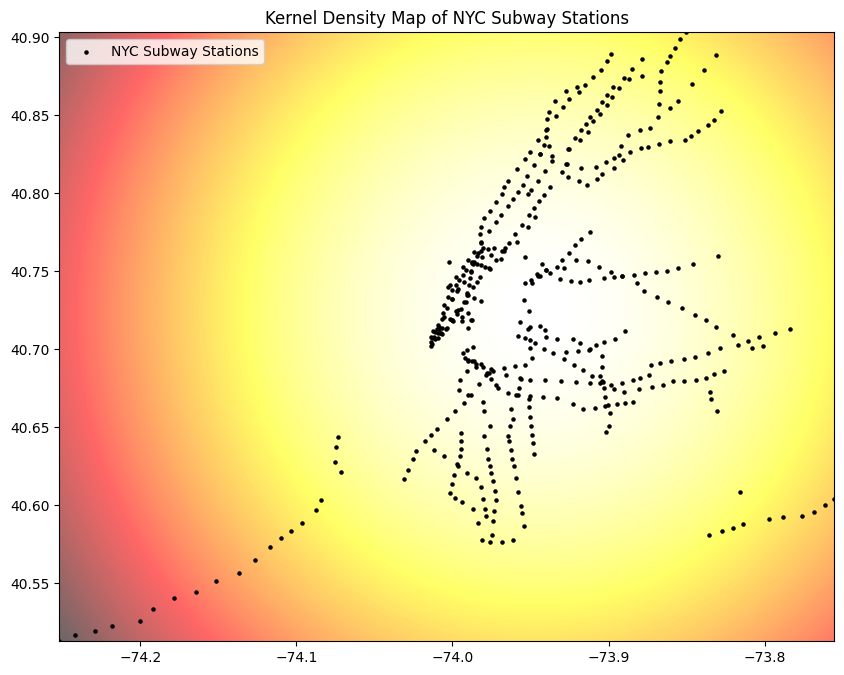

In [8]:

# Path to New York subway stations file
nyc_file = "MTA Subway Stations_20241024/geo_export_c1664305-f8f3-482b-9578-db838def4846.shp"  # Replace with your actual path

# Load the GeoDataFrame for New York subway stations
gdf = gpd.read_file(nyc_file)

# Extract coordinates for KDE
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
station_coords = gdf[['x', 'y']].values

# Perform KDE
kde = KernelDensity(bandwidth=10, kernel='gaussian')  # Adjust bandwidth based on scale
kde.fit(station_coords)

# Define the grid
xmin, ymin, xmax, ymax = gdf.total_bounds
xgrid = np.linspace(xmin, xmax, 500)
ygrid = np.linspace(ymin, ymax, 500)
xv, yv = np.meshgrid(xgrid, ygrid)
grid_coords = np.vstack([xv.ravel(), yv.ravel()]).T

# Calculate density
density = np.exp(kde.score_samples(grid_coords))
density = density.reshape(500, 500)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot subway station points
gdf.plot(ax=ax, color='black', markersize=5, label='NYC Subway Stations')

# Add KDE density map
ax.imshow(density, extent=(xmin, xmax, ymin, ymax), origin='lower', cmap='hot', alpha=0.6)

# Title and legend
ax.set_title('Kernel Density Map of NYC Subway Stations')
ax.legend()

plt.show()


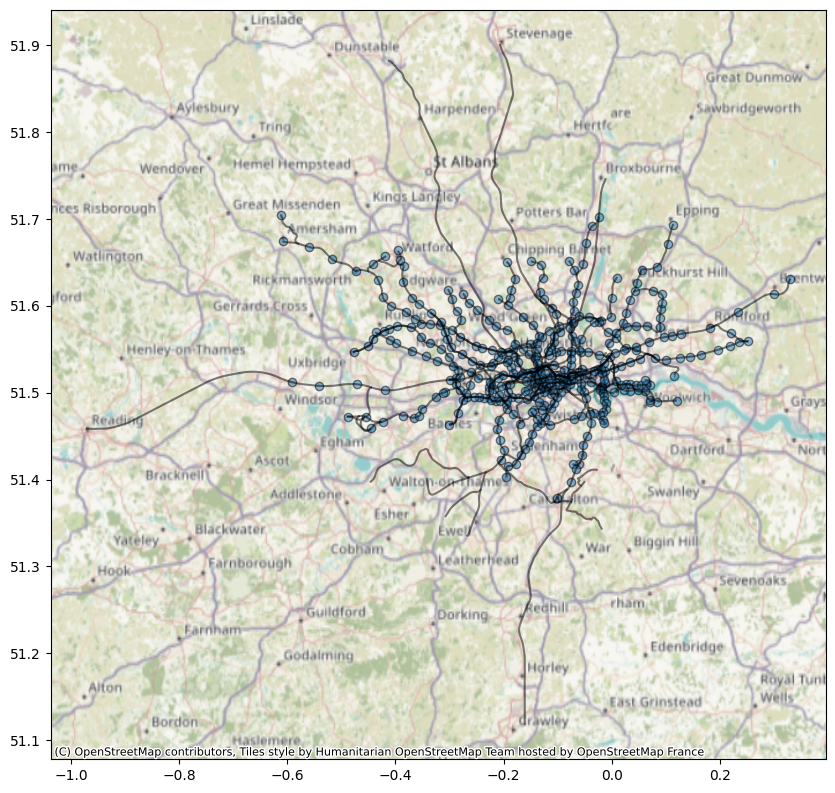

     id end_sid  name start_sid                   geometry
0  None    None  None      None   POINT (-0.1201 51.51711)
1  None    None  None      None  POINT (-0.11178 51.51818)
2  None    None  None      None   POINT (-0.1243 51.51309)
3  None    None  None      None  POINT (-0.12826 51.51148)
4  None    None  None      None  POINT (-0.11436 51.51097)


In [9]:
# Path to your GeoJSON file
geojson_file = 'data\ldn\london_stations.geojson'

# Read the GeoJSON file into a GeoPandas DataFrame
gdf = gpd.read_file(geojson_file)
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, crs=gdf.crs.to_string())
# Show the plot
plt.show()


# Display the first few rows of the GeoDataFrame
print(gdf.head())


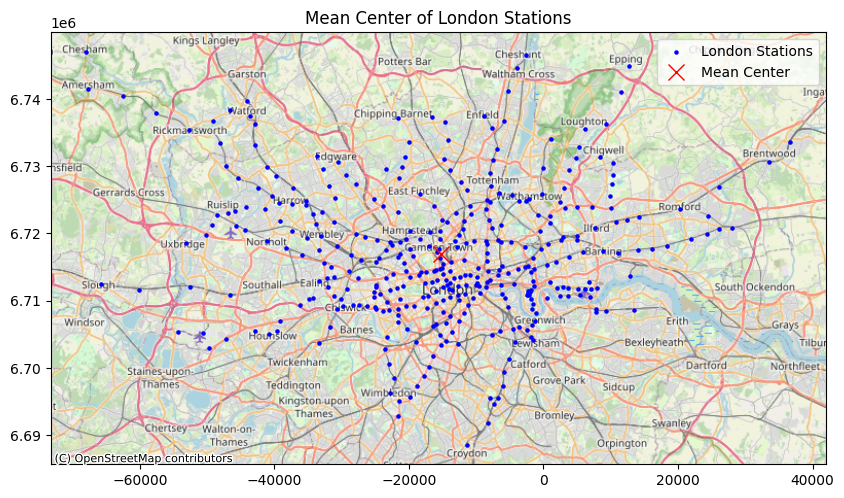

In [10]:
# Load the GeoDataFrame
geojson_file = 'data/ldn/london_stations.geojson'
gdf = gpd.read_file(geojson_file)

# Ensure CRS is set and reproject to Web Mercator for compatibility with basemaps
if gdf.crs is None:
    gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:3857")

# Filter for Point geometries only
gdf = gdf[gdf.geometry.type == "Point"]

# Extract x and y coordinates for mean center calculation
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
station_coords = gdf[['x', 'y']].values

# Calculate mean center using pointpats
point_pattern = PointPattern(station_coords)
mean_center_coords = mean_center(point_pattern.points)

# Plot stations, mean center, and basemap
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', markersize=5, label='London Stations')
ax.plot(mean_center_coords[0], mean_center_coords[1], 'x', color='red', markersize=12, label='Mean Center')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Add title and legend
plt.title("Mean Center of London Stations")
plt.legend()
plt.show()


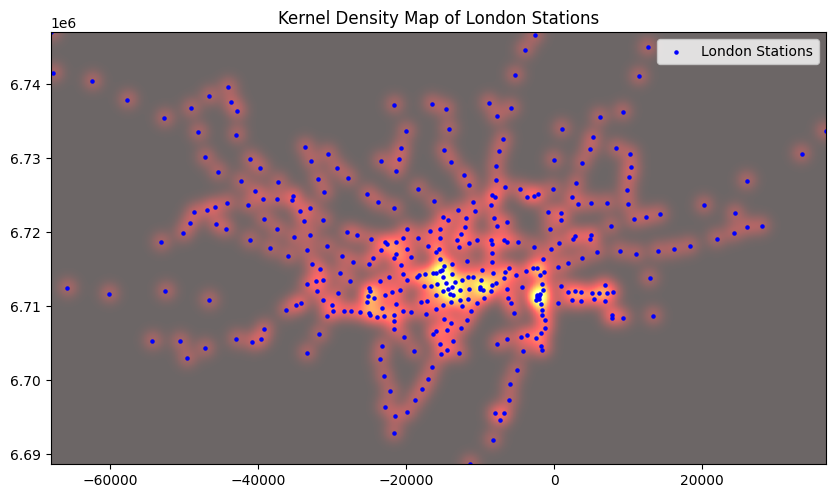

In [11]:
# Path to your GeoJSON file
geojson_file = 'data/ldn/london_stations.geojson'

# Load the GeoDataFrame
gdf = gpd.read_file(geojson_file)

# Ensure CRS is set and reproject to Web Mercator for compatibility with basemaps
if gdf.crs is None:
    gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:3857")

# Filter for Point geometries only
gdf = gdf[gdf.geometry.type == "Point"]

# Extract x and y coordinates for KDE
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
station_coords = gdf[['x', 'y']].values

# Perform KDE
kde = KernelDensity(bandwidth=1000, kernel='gaussian')  # Adjust bandwidth as needed
kde.fit(station_coords)

# Define grid for density calculation
xmin, ymin, xmax, ymax = gdf.total_bounds
xgrid = np.linspace(xmin, xmax, 500)
ygrid = np.linspace(ymin, ymax, 500)
xv, yv = np.meshgrid(xgrid, ygrid)
grid_coords = np.vstack([xv.ravel(), yv.ravel()]).T

# Calculate density
density = np.exp(kde.score_samples(grid_coords))
density = density.reshape(500, 500)

# Plot KDE with station points
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(density, extent=(xmin, xmax, ymin, ymax), origin='lower', cmap='hot', alpha=0.6)
gdf.plot(ax=ax, color='blue', markersize=5, label='London Stations')

# Add basemap for context
#ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Add title and legend
plt.title("Kernel Density Map of London Stations")
plt.legend()
plt.show()


### Referências Bibliográficas

https://github.com/lenkahas/London_tube_spatial_files

https://github.com/oobrien/vis/tree/master/tubecreature/data

https://data.europa.eu/data/datasets?locale=en

https://data.ny.gov/Transportation/MTA-Subway-Stations/39hk-dx4f/about_data